**Importiere die notwendigen Packages**

In [1]:
# Empfehlung für Colab: Installiere alles was Du brauchst
# %pip install pandas pivottablejs numpy altair matplotlib geopandas folium

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bau_best_geb_ea_pers_altersgruppe_quartier_jahr_OD6983

(int_dwh)

In [4]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bau_best_geb_ea_pers_altersgruppe_quartier_jahr_OD6983/BAU698OD6983.csv"

# bau_best_whg_wfl_pers_ea_quartier_jahr_od6982



# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [4]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [5]:
data2betested.head(300)

,StichtagDatJahr,QuarSort18,QuarLang18,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzGebMitPers,PersTotal,Alter0009,Alter1019,Alter2029,Alter3039,Alter4049,Alter5059,Alter6069,Alter7079,Alter80um
0,2008,10,Kreis 1,1,Kreis 1,1,Öffentlich/Genossenschaftlich,202,1689,86,146,240,178,237,277,243,113,169
1,2008,10,Kreis 1,1,Kreis 1,2,Übrige private Gesellschaften,218,1320,43,82,351,264,234,143,116,59,28
2,2008,10,Kreis 1,1,Kreis 1,3,Natürliche Personen,426,2117,64,59,385,522,394,282,228,119,64
3,2008,10,Kreis 1,1,Kreis 1,4,Im Stockwerkeigentum,63,410,22,18,64,84,57,57,71,27,10
4,2009,10,Kreis 1,1,Kreis 1,1,Öffentlich/Genossenschaftlich,201,1699,102,138,248,176,224,275,258,108,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2016,33,Friesenberg,3,Kreis 3,4,Im Stockwerkeigentum,28,297,38,14,36,73,45,29,19,24,19
296,2017,33,Friesenberg,3,Kreis 3,1,Öffentlich/Genossenschaftlich,1166,8424,1257,1324,754,862,1371,1076,717,528,535
297,2017,33,Friesenberg,3,Kreis 3,2,Übrige private Gesellschaften,60,818,109,30,113,215,142,66,48,52,43
298,2017,33,Friesenberg,3,Kreis 3,3,Natürliche Personen,241,1316,154,78,177,276,220,167,118,76,50


In [6]:
data2betested.dtypes

StichtagDatJahr     int64
QuarSort18          int64
QuarLang18         object
KreisSort           int64
KreisLang          object
EigGruSort          int64
EigGruLang         object
AnzGebMitPers       int64
PersTotal           int64
Alter0009           int64
Alter1019           int64
Alter2029           int64
Alter3039           int64
Alter4049           int64
Alter5059           int64
Alter6069           int64
Alter7079           int64
Alter80um           int64
dtype: object

In [7]:
data2betested.shape

(1508, 18)

Beschreibe einzelne Attribute

In [8]:
data2betested.describe()

,StichtagDatJahr,QuarSort18,KreisSort,EigGruSort,AnzGebMitPers,PersTotal,Alter0009,Alter1019,Alter2029,Alter3039,Alter4049,Alter5059,Alter6069,Alter7079,Alter80um
count,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508
mean,2014,69,7,2,311,3498,326,245,586,727,528,400,287,217,181
std,4,35,3,1,289,2745,289,252,531,628,409,310,225,185,176
min,2008,10,1,1,6,118,1,1,8,7,8,11,10,1,0
25%,2011,41,4,2,101,1302,106,71,156,205,203,155,108,71,40
50%,2014,71,7,2,203,2724,222,161,431,540,398,297,227,162,126
75%,2017,101,10,3,422,5651,496,334,888,1119,828,619,434,329,274
max,2020,123,12,4,1274,12181,1446,1449,2469,3062,1941,1558,1081,956,962


Wie viele Nullwerte gibt es im Datensatz?

In [9]:
data2betested.isnull().sum()

StichtagDatJahr    0
QuarSort18         0
QuarLang18         0
KreisSort          0
KreisLang          0
EigGruSort         0
EigGruLang         0
AnzGebMitPers      0
PersTotal          0
Alter0009          0
Alter1019          0
Alter2029          0
Alter3039          0
Alter4049          0
Alter5059          0
Alter6069          0
Alter7079          0
Alter80um          0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [10]:
#data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')
data2betested['Jahr']=pd.to_datetime(data2betested['Jahr'], format='%Y')
#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested


KeyError: 'Jahr'

Bereite die Daten für die Grafik unten vor

In [11]:
Jahre = data2betested.groupby("Jahr")
len(Jahre)

KeyError: 'Jahr'

In [12]:
for key, group in Jahre:
    print(key, len(group))

2008-01-01 00:00:00 116
2009-01-01 00:00:00 116
2010-01-01 00:00:00 116
2011-01-01 00:00:00 116
2012-01-01 00:00:00 116
2013-01-01 00:00:00 116
2014-01-01 00:00:00 116
2015-01-01 00:00:00 116
2016-01-01 00:00:00 116
2017-01-01 00:00:00 116
2018-01-01 00:00:00 116
2019-01-01 00:00:00 116
2020-01-01 00:00:00 116


In [13]:
myJahr = "2020-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr.head(3)


,Jahr,QuarSort18,QuarLang18,KreisSort,KreisLang,EigGruSort,EigGruLang,...,Alter2029,Alter3039,Alter4049,Alter5059,Alter6069,Alter7079,Alter80um
48,2020-01-01,10,Altstadt (Kreis 1),1,Kreis 1,1,Öffentlich/Genossenschaftlich,...,255,217,178,218,249,247,137
49,2020-01-01,10,Altstadt (Kreis 1),1,Kreis 1,2,Übrige private Gesellschaften,...,422,331,187,212,144,75,36
50,2020-01-01,10,Altstadt (Kreis 1),1,Kreis 1,3,Natürliche Personen,...,382,501,310,306,174,154,73


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [14]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    
test = data2betested.groupby(
    ['Jahr']
#   ['Jahr','QuarSort', 'QuarLang']
).agg(
    {
        'Alter2029': 'sum',
         'AnzGebMitPers': 'sum',
        'PersTotal':'sum',
    }
)
test.head(100)
    

,Alter2029,AnzGebMitPers,PersTotal
Jahr,,,
2008-01-01,66213,36218,379312
2009-01-01,65686,36084,381175
2010-01-01,65178,36013,384508
2011-01-01,66024,36072,389364
2012-01-01,66448,36033,393717
2013-01-01,66977,36044,398321
2014-01-01,68210,35998,404112
2015-01-01,68948,35953,410328
2016-01-01,69424,35869,415181


**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [15]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [16]:
mySelection = aktuellesJahr.groupby(
    ['Jahr','QuarSort18', 'QuarLang18']
#   ['Jahr','QuarSort', 'QuarLang']
).agg(
    {
        'Alter2029': 'sum',
         'AnzGebMitPers': 'sum',
        'PersTotal':'sum',
    }
)
mySelection


Alter2029  AnzGebMitPers  PersTotal
Jahr       QuarSort18 QuarLang18                                               
2020-01-01 10         Altstadt (Kreis 1)         1138            897       5831
           21         Wollishofen                2494           1807      19756
           23         Leimbach                    708            666       6111
           24         Enge                       1374            891       9655
           31         Alt-Wiedikon               2879           1207      17763
           33         Friesenberg                1094           1494      11070
           34         Sihlfeld                   3579           1224      21916
           41         Werd                        815            287       4570
           42         Langstrasse                2575            785      11893
           44         Hard                       2688            623      12554
           51         Gewerbeschule              1634            585       9424
           52         Escher Wyss                 908            285       6198
           61         Unterstrass                4438           2113      24407
           63         Oberstrass                 1785           1212      10824
           71         Fluntern                   1043           1004       8685
           72         Hottingen                  1490           1367      11304
           73         Hirslanden                  972            840       7396
           74         Witikon                    1097           1314      11244
           80         Riesbach (Kreis 8)         2403           1668      17456
           91         Albisrieden                2684           1687      22294
           92         Altstetten                 5490           2208      34096
           101        Höngg                      3462           2217      24439
           102        Wipkingen                  2481           1330      16605
           111        Affoltern                  4574           1882      26584
           115        Oerlikon                   5250           1834      23548
           119        Seebach                    4651           1816      26055
           121        Saatlen                    1394            995       8799
           122        Schwamendingen-Mitte       2196            790      11083
           123        Hirzenbach                 2354            981      12963

In [17]:
mySelection = aktuellesJahr[["Jahr","QuarLang18","QuarSort18","EigGruSort", "EigGruLang", "AnzGebMitPers", "PersTotal", "Alter6069","Alter80um"]]

mySelection.head(3)

,Jahr,QuarLang18,QuarSort18,EigGruSort,EigGruLang,AnzGebMitPers,PersTotal,Alter6069,Alter80um
48,2020-01-01,Altstadt (Kreis 1),10,1,Öffentlich/Genossenschaftlich,196,1756,249,137
49,2020-01-01,Altstadt (Kreis 1),10,2,Übrige private Gesellschaften,245,1521,144,36
50,2020-01-01,Altstadt (Kreis 1),10,3,Natürliche Personen,383,2049,174,73


In [18]:
agg_mySelection = mySelection.groupby(
   ['Jahr', 'QuarLang18', 'QuarSort18']#, "EigGruSort", "EigGruLang"
).agg(
    {
         'AnzGebMitPers':('sum'),     # Sum --> (sum)
         'PersTotal': ('sum'),
        'Alter6069': ('mean'),
        'Alter80um':('mean'),
    }
)
agg_mySelection

AnzGebMitPers  PersTotal  Alter6069  Alter80um
Jahr       QuarLang18           QuarSort18                                                
2020-01-01 Affoltern            111                  1882      26584        545        298
           Albisrieden          91                   1687      22294        460        332
           Alt-Wiedikon         31                   1207      17763        295        137
           Altstadt (Kreis 1)   10                    897       5831        156         68
           Altstetten           92                   2208      34096        684        416
           Enge                 24                    891       9655        152        105
           Escher Wyss          52                    285       6198         89         14
           Fluntern             71                   1004       8685        212        132
           Friesenberg          33                   1494      11070        247        164
           Gewerbeschule        51                    585       9424        172         56
           Hard                 44                    623      12554        244         94
           Hirslanden           73                    840       7396        169        127
           Hirzenbach           123                   981      12963        269        170
           Hottingen            72                   1367      11304        264        140
           Höngg                101                  2217      24439        551        395
           Langstrasse          42                    785      11893        189         40
           Leimbach             23                    666       6111        129         82
           Oberstrass           63                   1212      10824        224        134
           Oerlikon             115                  1834      23548        393        239
           Riesbach (Kreis 8)   80                   1668      17456        396        194
           Saatlen              121                   995       8799        157         64
           Schwamendingen-Mitte 122                   790      11083        254        147
           Seebach              119                  1816      26055        501        254
           Sihlfeld             34                   1224      21916        387        199
           Unterstrass          61                   2113      24407        439        212
           Werd                 41                    287       4570         68         32
           Wipkingen            102                  1330      16605        315        176
           Witikon              74                   1314      11244        282        274
           Wollishofen          21                   1807      19756        393        290

In [19]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['EigGruLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='QuarLang18',
    y='Alter80um',
    color='EigGruLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [20]:
alt.Chart(data2betested).mark_circle(size=60).encode(
    x='Jahr',
    y='EigGruLang',
    #color='AnzNat',
    #color=alt.Color('AnzNat', scale=alt.Scale(scheme='dark2')),
    color=alt.Color('Alter80um', scale=alt.Scale(scheme='greens')),
    tooltip=['Jahr','Alter80um','PersTotal']
).interactive() # this makes the axes interactive: now you can zoom & pan




alt.Chart(...)

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [21]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [22]:
agg_mySelection.head(2)

AnzGebMitPers  PersTotal  Alter6069  Alter80um
Jahr       QuarLang18  QuarSort18                                                
2020-01-01 Affoltern   111                  1882      26584        545        298
           Albisrieden 91                   1687      22294        460        332

In [23]:
stats_agg_quartiere = agg_mySelection
#stats_agg_quartiere=aktuellesJahr.groupby(['Jahr', 'QuarSort'])['AnzWhg','Wohnungsfl', 'PersInGeb'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
#stats_agg_quartiere.head()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
#stats_agg_quartiere

In [24]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort18'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(stats_agg_quartiere, on='QuarSort18')

stadtquartiere_shapes_joined.head(30)


,geometry,QuarSort18,qname,knr,AnzGebMitPers,PersTotal,Alter6069,Alter80um
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,Hirslanden,7,840,7396,169,127
1,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ...",41,Werd,4,287,4570,68,32
2,"POLYGON ((8.51937 47.37478, 8.51946 47.37465, ...",34,Sihlfeld,3,1224,21916,387,199
3,"POLYGON ((8.50127 47.37961, 8.50121 47.37957, ...",91,Albisrieden,9,1687,22294,460,332
4,"POLYGON ((8.58346 47.38831, 8.58418 47.38833, ...",72,Hottingen,7,1367,11304,264,140
5,"POLYGON ((8.54297 47.33543, 8.54285 47.33537, ...",21,Wollishofen,2,1807,19756,393,290
6,"POLYGON ((8.52688 47.40709, 8.52687 47.40711, ...",61,Unterstrass,6,2113,24407,439,212
7,"POLYGON ((8.52541 47.40617, 8.52548 47.40590, ...",101,Höngg,10,2217,24439,551,395
8,"POLYGON ((8.54746 47.39938, 8.54747 47.39939, ...",115,Oerlikon,11,1834,23548,393,239
9,"POLYGON ((8.53261 47.41622, 8.53249 47.41580, ...",111,Affoltern,11,1882,26584,545,298


<AxesSubplot:>

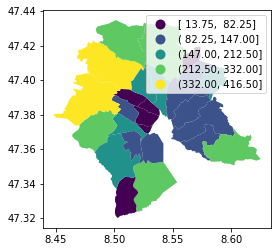

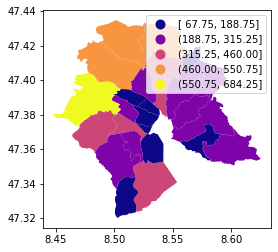

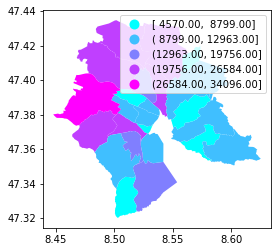

In [25]:
# Plot by StatQuartiere
# Weitere Schemes: scheme='quantiles', scheme='fisherjenks', scheme='natural_breaks',

stadtquartiere_shapes_joined.plot(column='Alter80um', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='Alter6069', cmap='plasma', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='PersTotal', cmap='cool', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=157&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**